In [135]:
## Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
## Read the data
FILENAME = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(FILENAME)

In [137]:
## Print data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [138]:
## Drop the id column
df.drop("id", axis=1, inplace=True)

In [139]:
## Check for missing values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [140]:
## Fill missing values (BMI)
df["bmi"].fillna(df["bmi"].mean(), inplace=True)

In [141]:
## Recheck for missing values
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [142]:
## Label Encoder
from sklearn.preprocessing import LabelEncoder

df = df.apply(LabelEncoder().fit_transform)
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,1,1
1,0,82,0,0,1,3,0,3588,162,2,1
2,1,101,0,1,1,2,0,2483,199,2,1
3,0,70,0,0,1,2,1,3385,218,3,1
4,0,100,1,0,1,3,0,3394,113,2,1
5,1,102,0,0,1,2,1,3448,164,1,1
6,1,95,1,1,1,2,0,588,147,2,1
7,0,90,0,0,0,2,1,1951,101,2,1
8,0,80,0,0,1,2,0,912,162,0,1
9,0,99,0,0,1,2,1,126,115,0,1


In [143]:
## Split the data into X and y
from sklearn.model_selection import train_test_split

X = df.drop("stroke", axis=1)
y = df["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [144]:
## One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

columns = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
transformer = make_column_transformer((OneHotEncoder(), columns), remainder="passthrough")

X_train_enc = transformer.fit_transform(X_train)
X_test_enc = transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

In [145]:
## Logistical Regression (C=0.1, max_iter=1000) with Label Encoder + One Hot Encoder
from sklearn.linear_model import LogisticRegression

# Fit the model
model = LogisticRegression(C=0.1, max_iter=1000)
model.fit(X_train_enc, y_train)

# Accuracy
print("Accuracy (Label Encoder + One Hot Encoder): ", model.score(X_test_enc, y_test))

Accuracy (Label Encoder + One Hot Encoder):  0.9504240052185258


In [146]:
## Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train_enc)
X_train_mmscaled = mm_scaler.transform(X_train_enc)
X_test_mmscaled = mm_scaler.transform(X_test_enc)

print("Minimum before scaling:\n{}".format(X_train_enc.min(axis=0)))
print("Maximum before scaling:\n {}".format(X_train_enc.max(axis=0)))
print("Minimum after scaling:\n {}".format(X_train_mmscaled.min(axis=0)))
print("Maximum after scaling:\n {}".format(X_train_mmscaled.max(axis=0)))

Minimum before scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum before scaling:
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
 1.000e+00 1.000e+00 1.030e+02 1.000e+00 1.000e+00 3.978e+03 4.180e+02]
Minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [147]:
## Logistical Regression (C=0.1, max_iter=1000) with Label Encoder + One Hot Encoder + Min Max Scaler
from sklearn.linear_model import LogisticRegression

# Fit the model
model = LogisticRegression(C=0.1, max_iter=1000)
model.fit(X_train_mmscaled, y_train)

# Accuracy
print("Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler): ", model.score(X_test_mmscaled, y_test))

Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler):  0.9504240052185258


X_train.shape: (3577, 21)
X_train_skb.shape: (3577, 15)
Selected features: Index(['onehotencoder__gender_1', 'onehotencoder__ever_married_0',
       'onehotencoder__ever_married_1', 'onehotencoder__work_type_2',
       'onehotencoder__work_type_3', 'onehotencoder__work_type_4',
       'onehotencoder__Residence_type_0', 'onehotencoder__Residence_type_1',
       'onehotencoder__smoking_status_0', 'onehotencoder__smoking_status_1',
       'remainder__age', 'remainder__hypertension', 'remainder__heart_disease',
       'remainder__avg_glucose_level', 'remainder__bmi'],
      dtype='object')


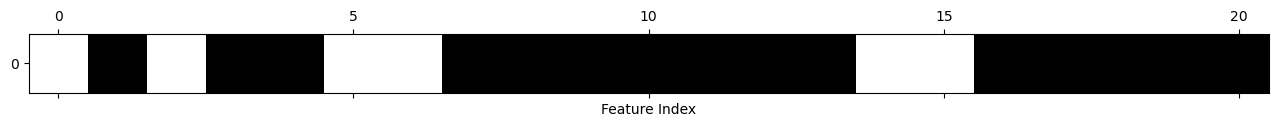

In [148]:
## Select K-Best
from sklearn.feature_selection import SelectKBest

skb = SelectKBest(k=15)
skb.fit(X_train_mmscaled, y_train)

X_train_skb = skb.transform(X_train_mmscaled)

print("X_train.shape: {}".format(X_train_mmscaled.shape))
print("X_train_skb.shape: {}".format(X_train_skb.shape))

mask = skb.get_support()
print("Selected features: {}".format(df_train_enc.columns[mask]))

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks([0])
plt.show()

In [149]:
## Logistical Regression (C=0.1, max_iter=1000) with Label Encoder + One Hot Encoder + Min Max Scaler + Select K-Best
from sklearn.linear_model import LogisticRegression

# Fit the model
model = LogisticRegression(C=0.1, max_iter=1000)
model.fit(X_train_skb, y_train)

X_test_skb = skb.transform(X_test_mmscaled)

# Accuracy
print("Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Select K-Best): ",
      model.score(X_test_skb, y_test))

Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Select K-Best):  0.9504240052185258


X_train.shape: (3577, 21)
X_train_sfm.shape: (3577, 11)
Selected features: Index(['onehotencoder__ever_married_0', 'onehotencoder__ever_married_1',
       'onehotencoder__work_type_2', 'onehotencoder__work_type_3',
       'onehotencoder__work_type_4', 'onehotencoder__Residence_type_1',
       'onehotencoder__smoking_status_0', 'onehotencoder__smoking_status_2',
       'remainder__age', 'remainder__hypertension',
       'remainder__heart_disease'],
      dtype='object')


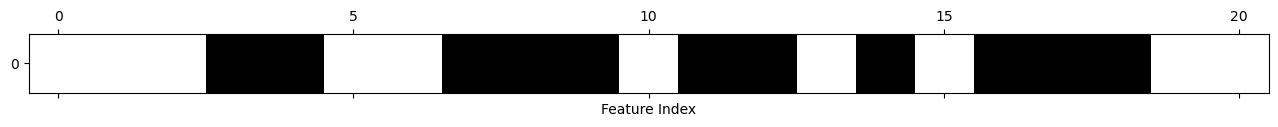

In [150]:
## Model-Based Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(LogisticRegression(C=0.1, max_iter=1000), threshold='median')
sfm.fit(X_train_enc, y_train)

X_train_sfm = sfm.transform(X_train_enc)
print("X_train.shape: {}".format(X_train_enc.shape))
print("X_train_sfm.shape: {}".format(X_train_sfm.shape))

mask = sfm.get_support()
print("Selected features: {}".format(df_train_enc.columns[mask]))
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Feature Index")
plt.yticks([0])
plt.show()

In [151]:
## Logistical Regression (C=0.1, max_iter=1000) with Label Encoder + One Hot Encoder + Min Max Scaler + Model-Based Feature Selection
from sklearn.linear_model import LogisticRegression

# Fit the model
model = LogisticRegression(C=0.1, max_iter=1000)
model.fit(X_train_sfm, y_train)

X_test_sfm = sfm.transform(X_test_enc)

# Accuracy
print("Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Model-Based Feature Selection): ",
      model.score(X_test_sfm, y_test))

Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Model-Based Feature Selection):  0.9504240052185258


In [152]:
## Evaluation (Logistical Regression)

print("[ Logistic Regression ]")

model.fit(X_train_enc, y_train)
print("Accuracy (Label Encoder + One Hot Encoder): ", model.score(X_test_enc, y_test))

model.fit(X_train_mmscaled, y_train)
print("Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler): ", model.score(X_test_mmscaled, y_test))

model.fit(X_train_skb, y_train)
print("Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Select K-Best): ",
      model.score(X_test_skb, y_test))

model.fit(X_train_sfm, y_train)
print("Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Model-Based Feature Selection): ",
      model.score(X_test_sfm, y_test))

[ Logistic Regression ]
Accuracy (Label Encoder + One Hot Encoder):  0.9504240052185258
Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler):  0.9504240052185258
Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Select K-Best):  0.9504240052185258
Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Model-Based Feature Selection):  0.9504240052185258


In [153]:
## Evaluation (Random Forest)
from sklearn.ensemble import RandomForestClassifier

print("[ Random Forest ]")

model = RandomForestClassifier(n_estimators=100, random_state=0)

model.fit(X_train_enc, y_train)
print("Accuracy (Label Encoder + One Hot Encoder): ", model.score(X_test_enc, y_test))

model.fit(X_train_mmscaled, y_train)
print("Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler): ", model.score(X_test_mmscaled, y_test))

model.fit(X_train_skb, y_train)
print("Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Select K-Best): ",
      model.score(X_test_skb, y_test))

model.fit(X_train_sfm, y_train)
print("Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Model-Based Feature Selection): ",
      model.score(X_test_sfm, y_test))

[ Random Forest ]
Accuracy (Label Encoder + One Hot Encoder):  0.949119373776908
Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler):  0.949119373776908
Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Select K-Best):  0.949119373776908
Accuracy (Label Encoder + One Hot Encoder + Min Max Scaler + Model-Based Feature Selection):  0.9341161121983039
